In [1]:
# Dependencies (just in case)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read in raw excel workbook
df = pd.read_excel('..//..//data/facilities/pcc19_util_data_prelim.xlsx', sheet_name='Page 1-8')

#Drop un-needed row headings
df = df.drop([0, 1, 2, 3])

# Fill in all blanks with 0 (for deep learning)
df = df.fillna(0)

# Replace X with 1 (for deep learning)
df = df.replace("X", 1)

# Drop all coloumns that are still blank
df = df.dropna()

# Trim Zip codes to length of 5
df.FAC_ZIP = df.FAC_ZIP.str.split('-').str[0]
df.FAC_PAR_CORP_ZIP = df.FAC_PAR_CORP_ZIP.str.split('-').str[0].fillna(0)

pd.set_option('max_columns', None)
# Reveiw results
df

Description     FAC_NO  \
4               0  306010376   
5               0  306010758   
6               0  306010802   
7               0  306010834   
8               0  306010992   
...           ...        ...   
1216            0  306584009   
1217            0  306584009   
1218            0  306584010   
1219            0  306584012   
1220            0          0   

                                               FAC_NAME  \
4                       CENTER FOR ELDERS' INDEPENDENCE   
5                            BERKELEY THERAPY INSTITUTE   
6                            EAST OAKLAND HEALTH CENTER   
7                                 AXIS COMMUNITY HEALTH   
8                            WEST OAKLAND HEALTH CENTER   
...                                                 ...   
1216                                  PEACH TREE CLINIC   
1217                                  PEACH TREE CLINIC   
1218                          MARYSVILLE IMMEDIATE CARE   
1219  HARMONY HEALTH MEDICAL CLINIC AND FAMILY RESOU...   
1220                                           n = 1216   

                         FAC_STR_ADDR     FAC_CITY FAC_ZIP     FAC_PHONE  \
4                     1850 FAIRWAY DR  SAN LEANDRO   94577  510-433-1150   
5      1749 MARTIN LUTHER KING JR WAY     BERKELEY   94709    5108418484   
6             7450 INTERNATIONAL BLVD      OAKLAND   94621  510-835-9610   
7                   4361 RAILROAD AVE   PLEASANTON   94566    9254621755   
8                      700 ADELINE ST      OAKLAND   94607  510-835-9610   
...                               ...          ...     ...           ...   
1216  5730 PACKARD AVE, STE 500 & 600   MARYSVILLE   95901  530-749-3242   
1217  5730 PACKARD AVE, STE 500 & 600   MARYSVILLE   95901    5307416245   
1218                       724 5TH ST   MARYSVILLE   95901  530-749-3242   
1219           1908 N BEALE RD, STE E   MARYSVILLE   95901  530-743-6888   
1220                                0            0     NaN             0   

          FAC_ADMIN_NAME FAC_OPERATED_THIS_YR  FAC_OP_PER_BEGIN_DT  \
4       Linda Trowbridge                  Yes  2019-01-01 00:00:00   
5          Naomi Pollack                  Yes  2019-01-01 00:00:00   
6     Preston DuFauchard                  Yes  2019-01-01 00:00:00   
7            Sue Compton                  Yes  2019-01-01 00:00:00   
8     Preston DuFauchard                  Yes  2019-01-01 00:00:00   
...                  ...                  ...                  ...   
1216     James Ellsworth                  Yes  2019-01-01 00:00:00   
1217     James Ellsworth                  Yes  2019-09-25 00:00:00   
1218     James Ellsworth                  Yes  2019-01-01 00:00:00   
1219      Rachel Farrell                  Yes  2019-01-01 00:00:00   
1220                   0                    0                    0   

        FAC_OP_PER_END_DT                                  FAC_PAR_CORP_NAME  \
4     2019-12-31 00:00:00                     Center for Elders Independence   
5     2019-12-31 00:00:00                                                  0   
6     2019-12-31 00:00:00                        West Oakland Health Council   
7     2019-12-31 00:00:00                              Axis Community Health   
8     2019-12-31 00:00:00                        West Oakland Health Council   
...                   ...                                                ...   
1216  2019-09-24 00:00:00                              Peach Tree Healthcare   
1217  2019-12-31 00:00:00                              Peach Tree Healthcare   
1218  2019-12-31 00:00:00                              Peach Tree Healthcare   
1219  2019-12-31 00:00:00  Harmony Health Medical Clinic and Family Resou...   
1220                    0                                                  0   

                  FAC_PAR_CORP_BUS_ADDR FAC_PAR_CORP_CITY FAC_PAR_CORP_STATE  \
4                       510 17th Street           Oakland    CA - California   
5                                    

In [3]:
# Add coloumns to find all patients that fit the profile and divide by all available patient totals
# EnglishPatients = (( (100 - df["PERCENT_PATS_POP_NON_ENGLISH"]) / 100) * df['TOT_PATS_BY_RACE'])
df['Target'] = (((df['RESPIRATORY_SYS_DISEASE_ENC'] + df['ENMD_IMMUNITY_DISORDER_ENC'] + df['TOT_FEMALE_PATS_BY_AGE'] + df['DIGESTIVE_SYS_DISEASE_ENC']  + df['SKIN_SUBCUTANEOUS_TISSUE_DISEASE_ENC'] + df['13_TO_14_YR_MALE_PATS'] + df['13_TO_14_YR_FEMALE_PATS'] + df['15_TO_19_YR_FEMALE_PATS'] + df['15_TO_19_YR_MALE_PATS'] + (( (100 - df["PERCENT_PATS_POP_NON_ENGLISH"]) / 100) * df['TOT_PATS_BY_RACE']))  / (df['TOT_PATS_BY_RACE']) * 10)) /100


In [4]:
df[['Target']]

Target
4     0.519794
5     0.154921
6     0.173184
7     0.169316
8     0.197962
...        ...
1216  0.189640
1217       NaN
1218  0.226461
1219  0.229627
1220       NaN

[1217 rows x 1 columns]

In [5]:
# Removing rows with Target as 0
df = df.dropna()

In [6]:
# Display results & stats
df[['Target']].mean()

Target    0.199722
dtype: float64

In [7]:
# Create label if Target is over the average of all targets
df['Label'] = df['Target'] >= 0.199722

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Display results
df[['Target','Label']]

Target  Label
4     0.519794   True
5     0.154921  False
6     0.173184  False
7     0.169316  False
8     0.197962  False
...        ...    ...
1214  0.255480   True
1215  0.254981   True
1216  0.189640  False
1218  0.226461   True
1219  0.229627   True

[1161 rows x 2 columns]

In [10]:
# Output CSV for deep learning
df.to_csv('..//..//data/facilities/All_Facilities.csv', index=False)

In [11]:
# Create numeric dataset for correlations
correlations_df = df[['FAC_ZIP','MEDI_CAL_ENC_BY_PAYER','PHYSICIAN_ENC_BY_PRIM_CARE_PROVIDER','PHYSICIAN_ASSIST_ENC_BY_PRIM_CARE_PROVIDER','FAM_NURSE_ENC_BY_PRIM_CARE_PROVIDER','VISIT_NURSE_ENC_BY_PRIM_CARE_PROVIDER','PSYCHIATRIST_ENC_BY_PRIM_CARE_PROVIDER','MENTAL_DISORDERS_ENC','SYMPTOMS_SIGNS_ILLDEFINED_CONDITIONS_ENC','Target']].astype(float)
correlations_df.dtypes

FAC_ZIP                                       float64
MEDI_CAL_ENC_BY_PAYER                         float64
PHYSICIAN_ENC_BY_PRIM_CARE_PROVIDER           float64
PHYSICIAN_ASSIST_ENC_BY_PRIM_CARE_PROVIDER    float64
FAM_NURSE_ENC_BY_PRIM_CARE_PROVIDER           float64
VISIT_NURSE_ENC_BY_PRIM_CARE_PROVIDER         float64
PSYCHIATRIST_ENC_BY_PRIM_CARE_PROVIDER        float64
MENTAL_DISORDERS_ENC                          float64
SYMPTOMS_SIGNS_ILLDEFINED_CONDITIONS_ENC      float64
Target                                        float64
dtype: object

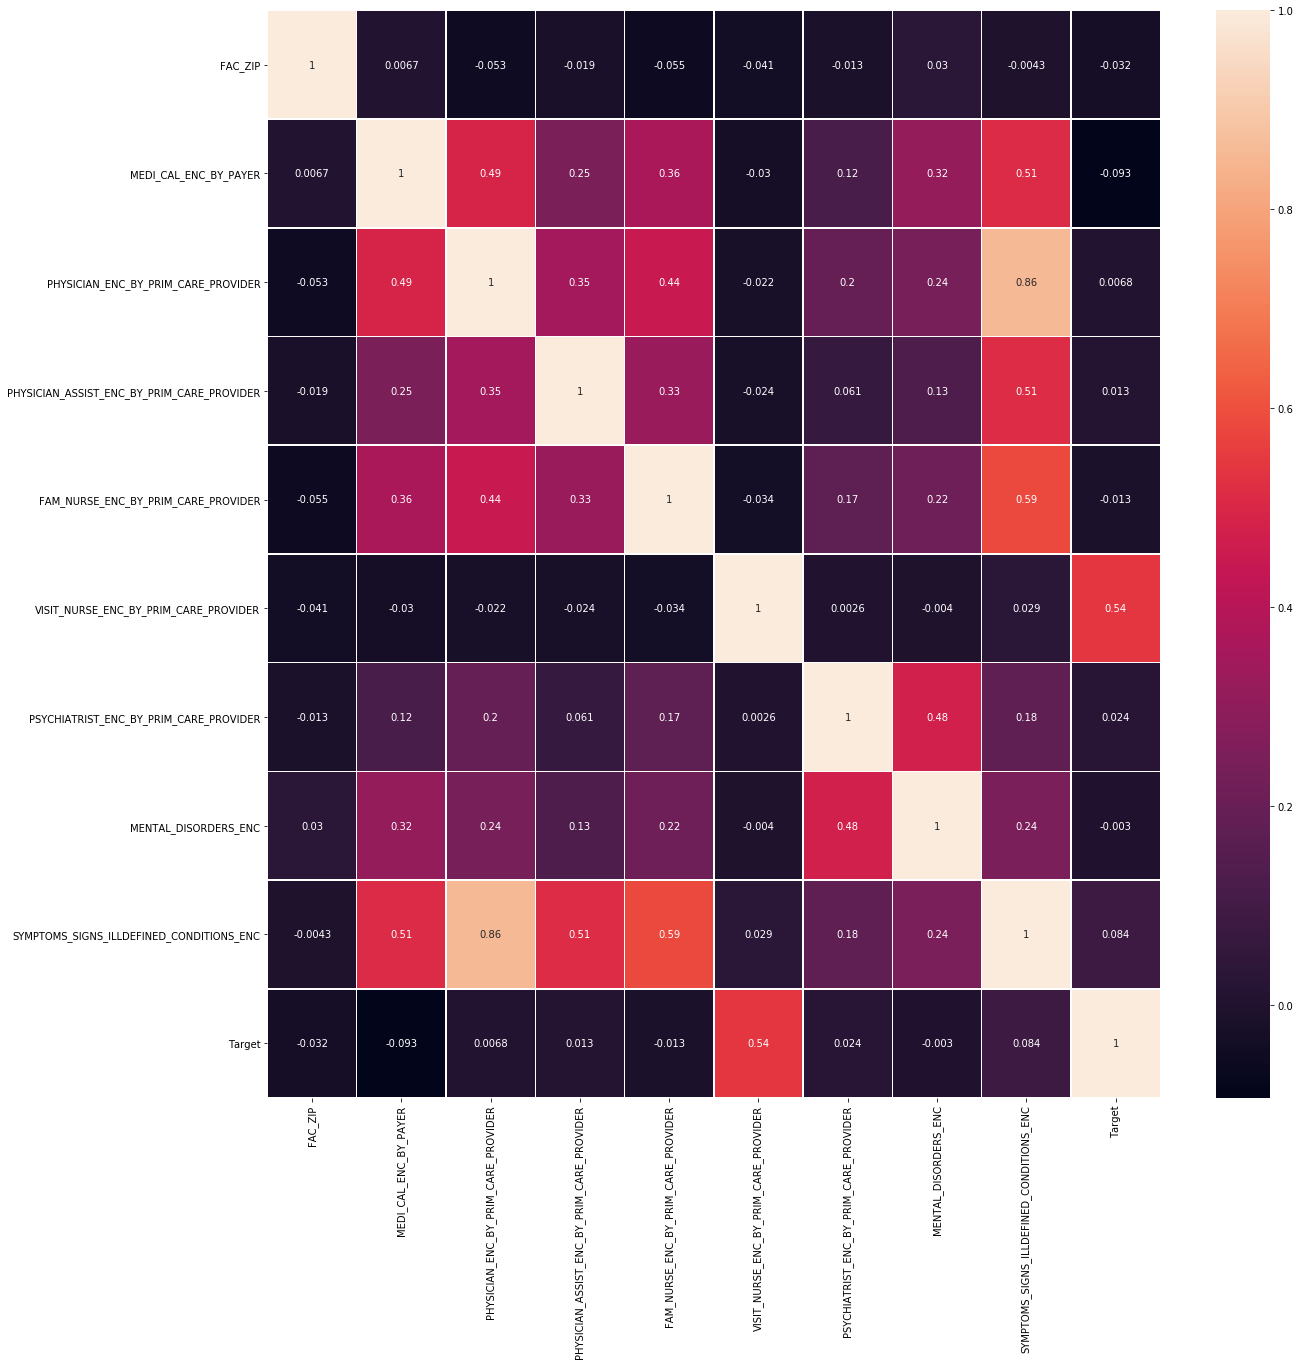

In [12]:
# View are assumed strong correlations
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, linewidths=.5)